### <font color = green>Importando Bibliotecas necessárias para a análise

In [1]:
import pandas as pd
import plotly.express as px
import dataframe_image as dfi

In [2]:
dados = pd.read_csv('china-eua_2015-2019.csv')

In [3]:
dados

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2015,2015,2015,2,0,0,M,156,China,...,0,-1,NaN,0,NaN,NaN,10816309,1.081631e+07,NaN,0
1,H4,2015,2015,2015,2,0,0,X,156,China,...,0,-1,NaN,0,NaN,NaN,22341450,NaN,2.234145e+07,0
2,H4,2015,2015,2015,2,0,0,M,156,China,...,0,-1,NaN,0,NaN,NaN,519370796,5.193708e+08,NaN,0
3,H4,2015,2015,2015,2,0,0,X,156,China,...,0,-1,NaN,0,NaN,NaN,2425331,NaN,2.425331e+06,0
4,H4,2015,2015,2015,2,0,0,M,156,China,...,0,-1,NaN,0,NaN,NaN,1083412158,1.083412e+09,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12518,H5,2019,2019,2019,2,0,0,X,156,China,...,0,-1,NaN,0,0.0,0.0,3983508597,NaN,3.983509e+09,4
12519,H5,2019,2019,2019,2,0,0,M,156,China,...,0,-1,NaN,0,0.0,0.0,63404658,6.340466e+07,NaN,4
12520,H5,2019,2019,2019,2,0,0,X,156,China,...,0,-1,NaN,0,0.0,0.0,76496409,NaN,7.649641e+07,4
12521,H5,2019,2019,2019,2,0,0,M,156,China,...,0,-1,NaN,0,0.0,0.0,141133058,1.411331e+08,NaN,0


In [4]:
# Definindo Variáveis Relevantes

dados_validos = dados.dropna(axis = 1)
dados_validos = dados_validos[['Year','Commodity','Trade Value (US$)','Trade Flow']]

In [5]:
# Verificando valores faltantes

dados_validos.isna().sum()

Year                 0
Commodity            0
Trade Value (US$)    0
Trade Flow           0
dtype: int64

In [6]:
dados_validos.head()

,Year,Commodity,Trade Value (US$),Trade Flow
0,2015,Animals; live,10816309,M
1,2015,Animals; live,22341450,X
2,2015,Meat and edible meat offal,519370796,M
3,2015,Meat and edible meat offal,2425331,X
4,2015,"Fish and crustaceans, molluscs and other aquat...",1083412158,M


# <font color= green>Dividindo o DataSet em Exportações e Importações

In [7]:
dados_validos['Trade Flow'].unique()

array(['M', 'X'], dtype=object)

In [8]:
importacoes = dados_validos[dados_validos['Trade Flow'] == 'M']
exportacoes = dados_validos[dados_validos['Trade Flow'] == 'X']

In [9]:
exportacoes

,Year,Commodity,Trade Value (US$),Trade Flow
1,2015,Animals; live,22341450,X
3,2015,Meat and edible meat offal,2425331,X
5,2015,"Fish and crustaceans, molluscs and other aquat...",1825894502,X
7,2015,Dairy produce; birds' eggs; natural honey; edi...,14607109,X
9,2015,Animal originated products; not elsewhere spec...,262085580,X
...,...,...,...,...
12514,2019,"Furniture; bedding, mattresses, mattress suppo...",27663911642,X
12516,2019,"Toys, games and sports requisites; parts and a...",19146920453,X
12518,2019,Miscellaneous manufactured articles,3983508597,X
12520,2019,Works of art; collectors' pieces and antiques,76496409,X


# <font color= green>Índices de Vantagens Comparativas Reveladas

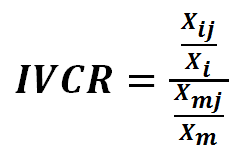

## <font color= green> Exportações da China para os EUA

In [10]:
# Exportação dos EUA para a China de cada um dos produtos por ano

produto_exportado_ano = exportacoes.pivot_table(columns = 'Year',values = 'Trade Value (US$)', index = 'Commodity')
produto_exportado_ano.reset_index(inplace = True)
produto_exportado_ano

Year,Commodity,2015,2016,2017,2018,2019
0,"Aircraft, spacecraft and parts thereof",2.220179e+08,1.235724e+08,1.678551e+08,1.168661e+09,1.166267e+09
1,Albuminoidal substances; modified starches; gl...,6.775400e+07,1.178654e+08,5.836400e+07,2.696135e+08,2.517588e+08
2,Aluminium and articles thereof,3.368173e+08,2.814300e+08,3.407446e+08,3.218527e+09,2.719693e+09
3,Animal or vegetable fats and oils and their cl...,5.762179e+07,7.588554e+07,5.623658e+07,8.830492e+07,8.721507e+07
4,Animal originated products; not elsewhere spec...,1.048342e+08,1.519524e+08,1.765086e+08,2.754885e+08,2.371341e+08
...,...,...,...,...,...,...
92,"Wadding, felt and nonwovens, special yarns; tw...",1.478465e+08,1.034076e+08,9.692325e+07,7.551846e+08,6.223133e+08
93,Wood and articles of wood; wood charcoal,3.553877e+08,3.438283e+08,3.176886e+08,3.894225e+09,2.929544e+09
94,"Wool, fine or coarse animal hair; horsehair ya...",3.772209e+07,2.061186e+07,4.067643e+07,3.536461e+07,1.661022e+07
95,Works of art; collectors' pieces and antiques,8.057094e+07,3.701166e+07,1.586595e+07,7.188824e+07,7.649641e+07


In [11]:
# Preenchendo os valores faltantes

produto_exportado_ano.fillna(value = 0, inplace = True)

In [12]:
# Valor Total das Exportações para a China por Ano

agrupamento = exportacoes['Trade Value (US$)']

exportacoes_totais = exportacoes.groupby(dados_validos['Year']).sum()
exportacoes_totais = pd.DataFrame(exportacoes_totais['Trade Value (US$)'])
exportacoes_totais.reset_index(inplace = True)

In [13]:
exportacoes_totais

,Year,Trade Value (US$)
0,2015,819958488786
1,2016,771355518848
2,2017,860656293048
3,2018,479701580548
4,2019,418584249557


In [14]:
exportacoes_totais.iloc[0,1]

819958488786

In [15]:
produto_exportado_ano

Year,Commodity,2015,2016,2017,2018,2019
0,"Aircraft, spacecraft and parts thereof",2.220179e+08,1.235724e+08,1.678551e+08,1.168661e+09,1.166267e+09
1,Albuminoidal substances; modified starches; gl...,6.775400e+07,1.178654e+08,5.836400e+07,2.696135e+08,2.517588e+08
2,Aluminium and articles thereof,3.368173e+08,2.814300e+08,3.407446e+08,3.218527e+09,2.719693e+09
3,Animal or vegetable fats and oils and their cl...,5.762179e+07,7.588554e+07,5.623658e+07,8.830492e+07,8.721507e+07
4,Animal originated products; not elsewhere spec...,1.048342e+08,1.519524e+08,1.765086e+08,2.754885e+08,2.371341e+08
...,...,...,...,...,...,...
92,"Wadding, felt and nonwovens, special yarns; tw...",1.478465e+08,1.034076e+08,9.692325e+07,7.551846e+08,6.223133e+08
93,Wood and articles of wood; wood charcoal,3.553877e+08,3.438283e+08,3.176886e+08,3.894225e+09,2.929544e+09
94,"Wool, fine or coarse animal hair; horsehair ya...",3.772209e+07,2.061186e+07,4.067643e+07,3.536461e+07,1.661022e+07
95,Works of art; collectors' pieces and antiques,8.057094e+07,3.701166e+07,1.586595e+07,7.188824e+07,7.649641e+07


In [16]:
# Criando o coeficiente de exportações para China divindo por exportações Totais

numerador_2015 = produto_exportado_ano[2015]/exportacoes_totais.iloc[0,1]
numerador_2016 = produto_exportado_ano[2016]/exportacoes_totais.iloc[1,1]
numerador_2017 = produto_exportado_ano[2017]/exportacoes_totais.iloc[2,1]
numerador_2018 = produto_exportado_ano[2018]/exportacoes_totais.iloc[3,1]
numerador_2019 = produto_exportado_ano[2019]/exportacoes_totais.iloc[4,1]

## <font color= green> Exportações da China para o Mundo

In [17]:
# Carregando os dados

negociacoes_mundiais = pd.read_csv('china-mundo-2015-2019.csv')

In [18]:
# Selecionando variáveis relevantes

negociacoes_mundiais = negociacoes_mundiais[['Year','Commodity','Trade Value (US$)','Trade Flow']]

In [20]:
# Dividindo o DataSet em Exportações e Importações

importacoes_mundiais = negociacoes_mundiais[negociacoes_mundiais['Trade Flow'] == 'Import']
exportacoes_mundiais = negociacoes_mundiais[negociacoes_mundiais['Trade Flow'] == 'Export']

In [21]:
# Exportações de produtos dos EUA para o Mundo por ano

produto_exportado_ano_mundial = exportacoes_mundiais.pivot_table(columns = 'Year',values = 'Trade Value (US$)', index = 'Commodity')
produto_exportado_ano_mundial.reset_index(inplace = True)

In [22]:
produto_exportado_ano_mundial

Year,Commodity,2015,2016,2017,2018,2019
0,"Aircraft, spacecraft and parts thereof",3470737587,3364512155,3667043101,4612433292,3906195452
1,Albuminoidal substances; modified starches; gl...,2639890932,2493481376,2841357791,3059205296,3232373044
2,Aluminium and articles thereof,23808387585,21208479017,22585177769,27077281867,26108435180
3,Animal or vegetable fats and oils and their cl...,666659899,584064967,839440202,1092620431,1189396817
4,Animal originated products; not elsewhere spec...,1771699224,1772362013,2309387133,2533416528,2393293765
...,...,...,...,...,...,...
92,"Wadding, felt and nonwovens, special yarns; tw...",4859369624,4905182575,5084134643,5742582236,6062448341
93,Wood and articles of wood; wood charcoal,14199341609,13544086576,13640033463,14888330424,13410434257
94,"Wool, fine or coarse animal hair; horsehair ya...",2281226735,2140643062,1999003482,2475896309,2359497192
95,Works of art; collectors' pieces and antiques,564988221,215430140,128227925,197293133,744838988


In [23]:
# Substituindo os NaNs por 0

produto_exportado_ano_mundial.fillna(value= 0, inplace = True)

In [24]:
# Valor Total das Exportações para a China por Ano

exportacoes_mundiais_totais = exportacoes_mundiais.pivot_table(columns = 'Year',values = 'Trade Value (US$)', index = 'Commodity')

In [25]:
# Exportações Totais

x_2015 = exportacoes_mundiais_totais[2015].sum()
x_2016 = exportacoes_mundiais_totais[2016].sum()
x_2017 = exportacoes_mundiais_totais[2017].sum()
x_2018 = exportacoes_mundiais_totais[2018].sum()
x_2019 = exportacoes_mundiais_totais[2019].sum()

exportacoes_mundiais_totais = pd.DataFrame(exportacoes_mundiais_totais['Trade Value (US$)'])
exportacoes_mundiais_totais.reset_index(inplace = True)

In [26]:
# Criando o coeficiente de exportações mundiais por produtos dividido por exportações mundiais totais

denominador_2015 = produto_exportado_ano_mundial[2015]/x_2015
denominador_2016 = produto_exportado_ano_mundial[2016]/x_2016
denominador_2017 = produto_exportado_ano_mundial[2017]/x_2017
denominador_2018 = produto_exportado_ano_mundial[2018]/x_2018
denominador_2019 = produto_exportado_ano_mundial[2019]/x_2019

In [38]:
denominador_2015

0     0.001527
1     0.001161
2     0.010472
3     0.000293
4     0.000779
        ...   
92    0.002137
93    0.006246
94    0.001003
95    0.000249
96    0.000231
Name: 2015, Length: 97, dtype: float64

### <font color= green> Calculando o IVCR

In [27]:
# Dividindo o numerador pelo denominador para calcular o IVCR 

ivcr_2015 = pd.Series(numerador_2015/denominador_2015)
ivcr_2016 = pd.Series(numerador_2016/denominador_2016)
ivcr_2017 = pd.Series(numerador_2017/denominador_2017)
ivcr_2018 = pd.Series(numerador_2018/denominador_2018)
ivcr_2019 = pd.Series(numerador_2019/denominador_2019)

In [28]:
# Criando a tabela com o IVCR

ivcr_2015_a_2019 = pd.DataFrame({'2015' : ivcr_2015,
                                  '2016':ivcr_2016,
                                 '2017' : ivcr_2017,
                                 '2018' : ivcr_2018,
                                 '2019' : ivcr_2019})

ivcr_2015_a_2019.index = produto_exportado_ano_mundial['Commodity']
ivcr_2015_a_2019.fillna(value = 0, inplace = True)

In [29]:
ivcr_2015_a_2019 = ivcr_2015_a_2019.round(2)

In [40]:
ivcr_2015_a_2019

,2015,2016,2017,2018,2019
Commodity,,,,,
"Aircraft, spacecraft and parts thereof",0.18,0.10,0.12,1.32,1.78
Albuminoidal substances; modified starches; glues; enzymes,0.07,0.13,0.05,0.46,0.46
Aluminium and articles thereof,0.04,0.04,0.04,0.62,0.62
Animal or vegetable fats and oils and their cleavage products; prepared animal fats; animal or vegetable waxes,0.24,0.35,0.18,0.42,0.44
Animal originated products; not elsewhere specified or included,0.16,0.23,0.20,0.57,0.59
...,...,...,...,...,...
"Wadding, felt and nonwovens, special yarns; twine, cordage, ropes and cables and articles thereof",0.08,0.06,0.05,0.68,0.61
Wood and articles of wood; wood charcoal,0.07,0.07,0.06,1.36,1.30
"Wool, fine or coarse animal hair; horsehair yarn and woven fabric",0.05,0.03,0.05,0.07,0.04


# <font color = green> Comércio Intraindustrial (CII)

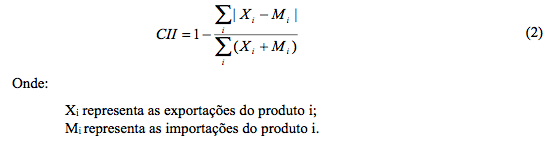

In [31]:
# Realizando Cálculo das Importações Totais

importacoes_totais = importacoes.groupby(dados_validos['Year']).sum()
importacoes_totais = pd.DataFrame(importacoes_totais['Trade Value (US$)'])
importacoes_totais.reset_index(inplace = True)

importacoes_totais

,Year,Trade Value (US$)
0,2015,297386112410
1,2016,270240266146
2,2017,308883711748
3,2018,156004352076
4,2019,123235656498


In [32]:
# Importação dos EUA para a China de cada um dos produtos por ano

produto_importado_ano = importacoes.pivot_table(columns = 'Year',values = 'Trade Value (US$)', index = 'Commodity')
produto_importado_ano.reset_index(inplace = True)

# Preenchendo os valores faltantes

produto_importado_ano.fillna(value = 0, inplace = True)
produto_importado_ano

Year,Commodity,2015,2016,2017,2018,2019
0,"Aircraft, spacecraft and parts thereof",5.980252e+08,4.661485e+08,4.849435e+08,1.653853e+10,7.177364e+09
1,Albuminoidal substances; modified starches; gl...,2.019288e+07,1.922924e+07,2.171466e+07,5.136896e+08,4.556706e+08
2,Aluminium and articles thereof,5.253604e+07,3.962840e+07,4.070379e+07,1.234202e+09,9.479936e+08
3,Animal or vegetable fats and oils and their cl...,7.505556e+06,1.867136e+07,1.262926e+07,1.057811e+08,9.655823e+07
4,Animal originated products; not elsewhere spec...,4.750137e+07,3.191861e+07,2.788685e+07,1.198704e+08,1.605393e+08
...,...,...,...,...,...,...
92,"Wadding, felt and nonwovens, special yarns; tw...",1.187940e+07,9.944121e+06,1.031444e+07,1.807836e+08,1.490203e+08
93,Wood and articles of wood; wood charcoal,2.019161e+08,2.286910e+08,2.046231e+08,3.080853e+09,1.580023e+09
94,"Wool, fine or coarse animal hair; horsehair ya...",2.122973e+06,1.656146e+06,2.765460e+06,1.866707e+07,7.093525e+06
95,Works of art; collectors' pieces and antiques,2.389252e+06,2.224402e+06,1.776404e+06,2.706745e+07,6.340466e+07


In [33]:
# Cálculo do numerador = exportações - importações (valor absoluto)

cii_numerador = pd.DataFrame(abs(produto_exportado_ano[[2015, 2016, 2017, 2018, 2019]] - produto_importado_ano[[2015, 2016, 2017, 2018, 2019]]))


cii_numerador


Year,2015,2016,2017,2018,2019
0,3.760073e+08,3.425760e+08,3.170884e+08,1.536987e+10,6.011096e+09
1,4.756113e+07,9.863613e+07,3.664934e+07,2.440761e+08,2.039119e+08
2,2.842813e+08,2.418016e+08,3.000408e+08,1.984325e+09,1.771700e+09
3,5.011623e+07,5.721418e+07,4.360733e+07,1.747618e+07,9.343156e+06
4,5.733287e+07,1.200338e+08,1.486217e+08,1.556181e+08,7.659472e+07
...,...,...,...,...,...
92,1.359671e+08,9.346351e+07,8.660881e+07,5.744010e+08,4.732929e+08
93,1.534716e+08,1.151373e+08,1.130656e+08,8.133718e+08,1.349520e+09
94,3.559912e+07,1.895571e+07,3.791097e+07,1.669754e+07,9.516697e+06
95,7.818169e+07,3.478726e+07,1.408955e+07,4.482079e+07,1.309175e+07


In [34]:
# Cálculo do Denominador = exportações dos EUA para China - Importações dos EUA para China por ano

cii_denominador = produto_exportado_ano[[2015, 2016, 2017, 2018, 2019]] + produto_importado_ano[[2015, 2016, 2017, 2018, 2019]]

cii_denominador

Year,2015,2016,2017,2018,2019
0,8.200430e+08,5.897209e+08,6.527986e+08,1.770719e+10,8.343631e+09
1,8.794688e+07,1.370946e+08,8.007866e+07,7.833031e+08,7.074294e+08
2,3.893534e+08,3.210584e+08,3.814484e+08,4.452730e+09,3.667687e+09
3,6.512734e+07,9.455691e+07,6.886584e+07,1.940860e+08,1.837733e+08
4,1.523356e+08,1.838710e+08,2.043954e+08,3.953589e+08,3.976734e+08
...,...,...,...,...,...
92,1.597259e+08,1.133517e+08,1.072377e+08,9.359682e+08,7.713336e+08
93,5.573038e+08,5.725193e+08,5.223117e+08,6.975078e+09,4.509567e+09
94,3.984507e+07,2.226801e+07,4.344189e+07,5.403168e+07,2.370375e+07
95,8.296019e+07,3.923606e+07,1.764236e+07,9.895568e+07,1.399011e+08


In [35]:
cii = 1-(cii_numerador/cii_denominador)
cii.index = produto_exportado_ano['Commodity']
cii = cii.round(4)
 
cii.fillna(value =0, inplace = True)
cii

Year,2015,2016,2017,2018,2019
Commodity,,,,,
"Aircraft, spacecraft and parts thereof",0.5415,0.4191,0.5143,0.1320,0.2796
Albuminoidal substances; modified starches; glues; enzymes,0.4592,0.2805,0.5423,0.6884,0.7118
Aluminium and articles thereof,0.2699,0.2469,0.2134,0.5544,0.5169
Animal or vegetable fats and oils and their cleavage products; prepared animal fats; animal or vegetable waxes,0.2305,0.3949,0.3668,0.9100,0.9492
Animal originated products; not elsewhere specified or included,0.6236,0.3472,0.2729,0.6064,0.8074
...,...,...,...,...,...
"Wadding, felt and nonwovens, special yarns; twine, cordage, ropes and cables and articles thereof",0.1487,0.1755,0.1924,0.3863,0.3864
Wood and articles of wood; wood charcoal,0.7246,0.7989,0.7835,0.8834,0.7007
"Wool, fine or coarse animal hair; horsehair yarn and woven fabric",0.1066,0.1487,0.1273,0.6910,0.5985


## Exportando arquivos 

In [37]:
cii.to_csv('cii_2015_2019.csv', sep =';')
ivcr_2015_a_2019.to_csv('calculo_do_ivcr_2015_a_2019.csv', sep = ';')